# Inference with missing values

Our task will be to estimate means despite of missing values with four approaches:
* Complete-case analysis
* Single imputation
* Inverse Probability Weighting (IPW)
* Augmented Inverse Probability Weighting (AIPW)

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Load functions for generating data, plots, ...

In [2]:
from inference_utils import generate_X, generate_MCAR_missingness, generate_MAR_missingness, generate_MNAR_missingness, plot_X, plot_x1

In [3]:
# Define some constants
# analysis will be repeated n_datasets times to capture sampling variance.
n_datasets = 30
n_samples = 1000
missing_rate = 0.5
methods = ['cc', 'si', 'ipw', 'aipw']

In [4]:
# Generate data
X_complete = generate_X(n_samples=100, seed=0)

In [5]:
# Generate missing values
X = generate_MCAR_missingness(X_complete, missing_rate, 0)

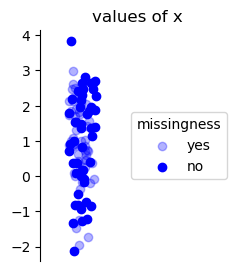

In [6]:
# Plot the values of the first variable in X.
x1 = X_complete[:, 0]
m1 = np.isnan(X[:, 0])
plot_x1(x1, m1)

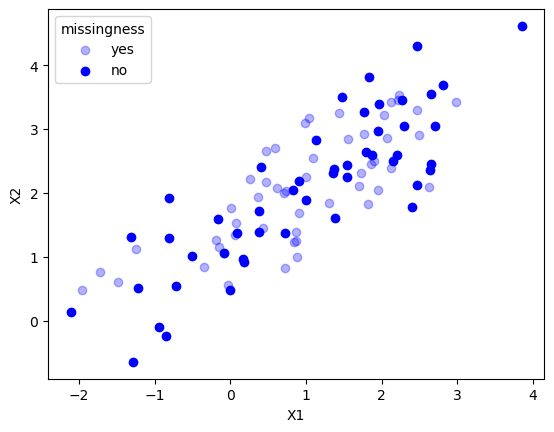

In [7]:
# Plot the 2-dimensional data
plot_X(X_complete, m1)

### 1 - Complete-case estimator

Complete the function below to return a mean estimated using the complete-case estimator.

In [ ]:
def complete_case_estimator(x):
    """Returns the mean of a vector with missing values, using complete-case
    analysis.

    Parameters
    ----------
    x: array-like of shape (n_samples, )
        A vector with missing values.
    """
    # ------------TO DO ------------

Check that the complete-case estimator outputs a reasonable estimate.

In [ ]:
x1 = X[:, 0]
mean_cc = complete_case_estimator(x1)
print(f"Complete-case estimation: {mean_cc}")

### 2 - Single-imputation estimator

Complete the function below to return a mean estimated using single imputation.

In [ ]:
def single_imputation_estimator(x):
    """Returns the mean of a vector with missing values, using single
    imputation by the mean for inference.

    Parameters
    ----------
    x: array-like of shape (n_samples, )
        A vector with missing values.
    """
    # ------------TO DO ------------
    # Hint: use skearn's SimpleImputer

Check that the single-imputation estimator outputs a reasonable estimate.

In [ ]:
x1 = X[:, 0]
mean_si = single_imputation_estimator(x1)
print(f"Single-Imputation estimation: {mean_si}")

### 3 - Inverse Probability Weighting (IPW)

Complete the function below to return a mean estimated using IPW.

In [ ]:
def ipw_estimator(X):
    """Returns the mean of a vector with missing values, using inverse
    probability weighting.

    Parameters
    ----------
    X: array-like of shape (n_samples, 2)
        Data with missing values only in the first column.
    """
    # ------------TO DO ------------
    # Hint: use skearn's LogisticRegression to learn the probability

Check that the IPW estimator outputs a reasonable estimate.

In [ ]:
mean_ipw = ipw_estimator(X)
print(f"IPW estimation: {mean_ipw}")

### 4 - Augmented Inverse Probability Weighting (AIPW)

Complete the function below to return a mean estimated using AIPW.

In [ ]:
def aipw_estimator(X):
    """Returns the mean of a vector with missing values, using inverse
    probability weighting.

    Parameters
    ----------
    X: array-like of shape (n_samples, 2)
        Data with missing values only in the first column.
    """
    # ------------TO DO ------------
    # Hint: use skearn's LogisticRegression to learn te probability
    # and skearn's LinearRegression to predict outcomes.

Check that the AIPW estimator outputs a reasonable estimate.

In [ ]:
mean_aipw = aipw_estimator(X)
print(f"AIPW estimation: {mean_aipw}")

### 5 - Compare estimators

we will now compare the four estimators under the 3 missing data mechanisms.

In [ ]:
# Perform inference using the various methods defined above on many
# simulated datasets with different missing data mechanisms, and plot the
# results.
perfs = []
for i in range(20):
    for mdm in ['MCAR', 'MAR', 'MNAR']:
        for method in methods:
            # Generate data
            X_complete = generate_X(n_samples, i)

            # Generate missingness
            if mdm == 'MCAR':
                X = generate_MCAR_missingness(X_complete, missing_rate, i)
            elif mdm == 'MAR':
                X = generate_MAR_missingness(X_complete, i)
            elif mdm == 'MNAR':
                X = generate_MNAR_missingness(X_complete, i)
            x = X[:, 0]

            # Inference
            if method == 'cc':
                mean = complete_case_estimator(x)
            elif method == 'si':
                mean = single_imputation_estimator(x)
            elif method == 'ipw':
                mean = ipw_estimator(X)
            elif method == 'aipw':
                mean = aipw_estimator(X)
            perf_item = {'iter': i, 'mdm': mdm, 'method': method,
                         'mean': mean}
            perfs.append(perf_item)

df = pd.DataFrame(perfs)
plt.axhline(y=1, color='r', linestyle='-', zorder=0)
sns.boxplot(data=df, y='mean', x='method', hue='mdm')
plt.show()

Verify that the results you obtain are coherent with what you should obtain for the different missing data mechanisms.